# O Gol Que Pelé Não Fez

### Lucas Muchaluat e Victor Habib

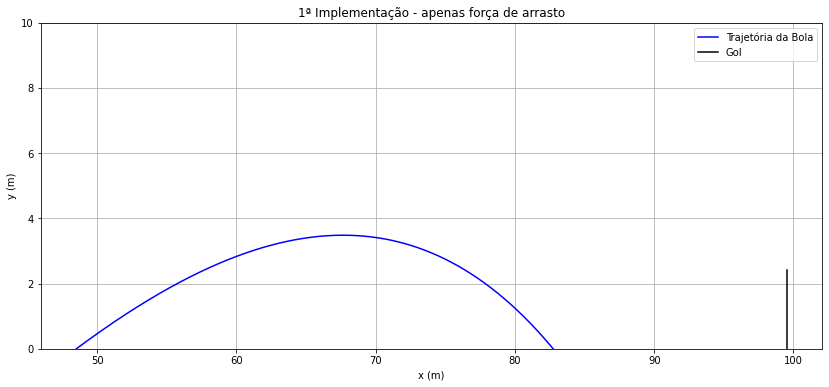

In [3]:
#primeira implementacao: força de arrasto

import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif(lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Vx=lista_sol[2]
    Vy=lista_sol[3]
    
    dXdt=Vx
    dYdt=Vy
    dVxdt=-((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))
    dVydt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
    return [dXdt, dYdt, dVxdt, dVydt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, Vo*math.cos(angulo), Vo*math.sin(angulo)] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

plt.figure(figsize=(14,6))
plt.ylim((0,10))
plt.title('1ª Implementação - apenas força de arrasto')
plt.plot(solucao[:,0], solucao[:,1], 'b-', label='Trajetória da Bola')
plt.plot(x1, y1, 'k-', label='Gol')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

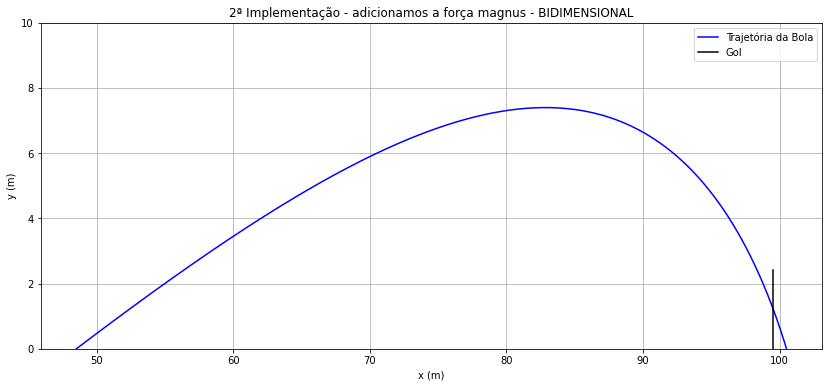

In [4]:
#segunda implementacao: forca de arrasto + forca magnus (back spin) -> efeito de sustentacao
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif (lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Vx=lista_sol[2]
    Vy=lista_sol[3]
    
    dXdt=Vx
    dYdt=Vy
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
    return [dXdt, dYdt, dVxdt, dVydt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, Vo*math.cos(angulo), Vo*math.sin(angulo)] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

plt.figure(figsize=(14,6))
plt.ylim((0,10))
plt.title('2ª Implementação - adicionamos a força magnus - BIDIMENSIONAL')
plt.plot(solucao[:,0], solucao[:,1], 'b-', label='Trajetória da Bola')
plt.plot(x1, y1, 'k-', label='Gol')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

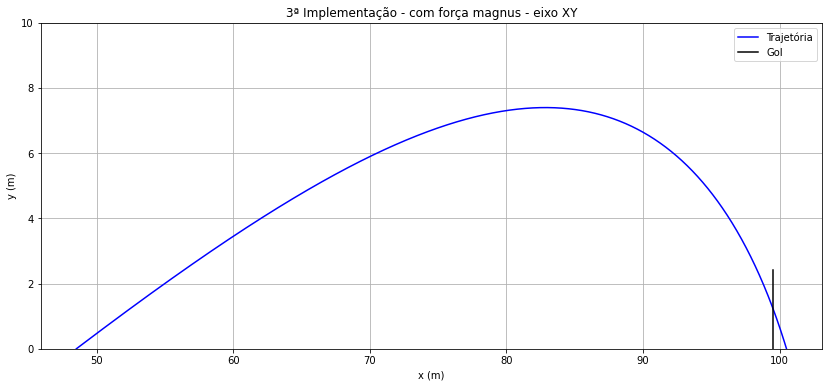

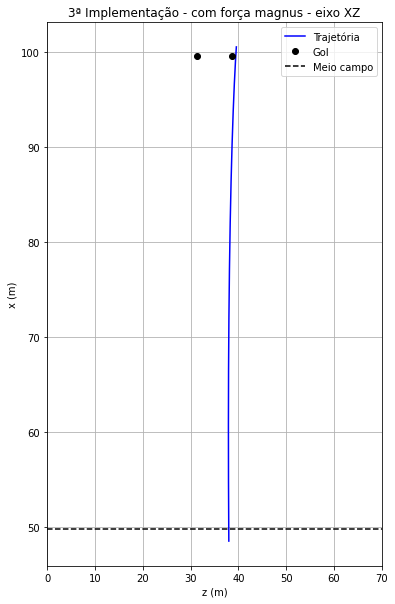

In [5]:
#terceira implementacao: forca de arrasto + forca magnus (backspin) + forca magnus (efeito lateral)
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif(lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=(1/2*Cm*pho*A*((Vz**2+Vx**2)**(1/2)))/mBola
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, 38, Vo*math.cos(angulo), Vo*math.sin(angulo), -0.4] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

lista1=[31.34, 38.66]
lista2=[99.5, 99.5]

#plotando a linha do meio campo
lista_meio_z=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
lista_meio_x=[49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75]

plt.figure(figsize=(14,6))
plt.ylim((0,10))
plt.title('3ª Implementação - com força magnus - eixo XY')
plt.plot(solucao[:,0], solucao[:,1], 'b-', label='Trajetória')
plt.plot(x1, y1, 'k-', label='Gol')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,10))
plt.title('3ª Implementação - com força magnus - eixo XZ')
plt.xlim((0, 70))
plt.plot(solucao[:,2], solucao[:,0], 'b-', label='Trajetória')
plt.plot(lista1, lista2, 'ko', label='Gol')
plt.plot(lista_meio_z, lista_meio_x, 'k--', label='Meio campo')
plt.xlabel('z (m)')
plt.ylabel('x (m)')
plt.legend()
plt.grid(True)
plt.show()

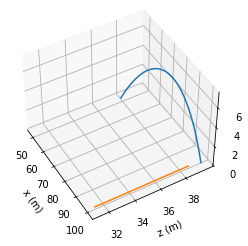

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = [99.5, 99.5]
y = [31.34, 38.66]
z = [0, 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(solucao[:, 0], solucao[:, 2], solucao[:, 1])
ax.view_init(45,-30)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
ax.plot(x, y, z)

for angle in range(0, 360):
    ax.view_init(45,-30)
plt.draw()
plt.pause(.001)

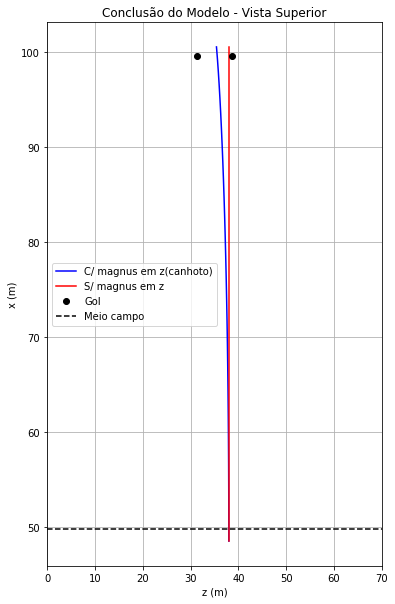

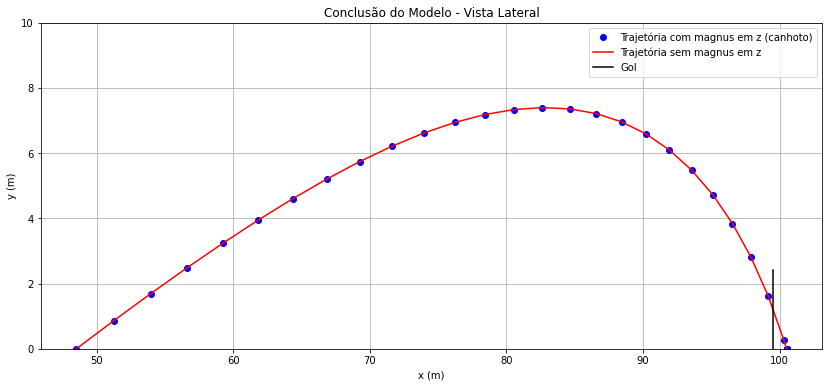

In [7]:
#conclusao 2

import math
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Cd=0.47
p=1.2
g=10
mBola=670*10**-3
b=11*10**-2
s=1
A=0.038
Cm = 1


def EqDif(lista_sol,t): #[X,Y,Vx,Vy]
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=-(1/2*Cm*pho*A*((Vz**2+Vx**2)**(1/2)))/mBola
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

def EqDif2(lista_sol,t): #[X,Y,Vx,Vy]
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=0
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.1) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, 38, Vo*math.cos(angulo), Vo*math.sin(angulo), 0] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

solucao2=odeint(EqDif2, CI, tempo)

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

lista1=[31.34, 38.66]
lista2=[99.5, 99.5]

#plotando a linha do meio campo
lista_meio_z=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
lista_meio_x=[49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75]

plt.figure(figsize=(6,10))
plt.xlim((0, 70))
plt.title('Conclusão do Modelo - Vista Superior')
plt.plot(solucao[:,2], solucao[:,0], 'b-', label='C/ magnus em z(canhoto)')
plt.plot(solucao2[:,2], solucao2[:,0], 'r-', label='S/ magnus em z')
plt.plot(lista1, lista2, 'ko', label='Gol')
plt.plot(lista_meio_z, lista_meio_x, 'k--', label='Meio campo')
plt.xlabel('z (m)')
plt.ylabel('x (m)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.ylim((0, 10))
plt.title('Conclusão do Modelo - Vista Lateral')
plt.plot(solucao[:,0], solucao[:,1], 'bo', label='Trajetória com magnus em z (canhoto)')
plt.plot(solucao2[:,0], solucao2[:,1], 'r-', label='Trajetória sem magnus em z')
plt.plot(x1, y1, 'k-', label='Gol')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()

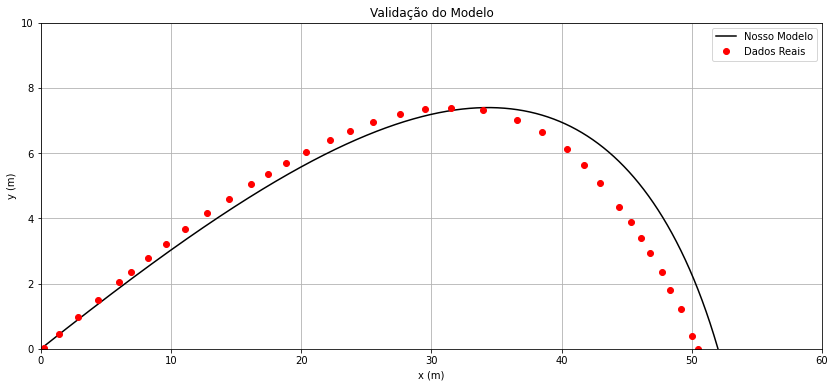

In [8]:
#segunda implementacao: forca de arrasto + forca magnus (back spin) -> efeito de sustentacao
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif (lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Vx=lista_sol[2]
    Vy=lista_sol[3]
    
    dXdt=Vx
    dYdt=Vy
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
    return [dXdt, dYdt, dVxdt, dVydt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[0, 0 ,Vo*math.cos(angulo), Vo*math.sin(angulo)] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

#Validando...  --> http://www.if.ufrj.br/~carlos/inic/gustavo/gustavo_jic.pdf
listax=[]
listax_adiantada=[4.2696629213483135,5.393258426966291,6.853932584269661,8.426966292134832,10,10.89887640449438,12.247191011235955,13.59550561797753,15.056179775280896,16.741573033707866,18.42696629213483,20.1123595505618,21.460674157303366,22.808988764044948,24.382022471910112,26.179775280898873,27.752808988764045,29.550561797752813,31.57303370786517,33.483146067415724,35.50561797752808,37.97752808988764,40.561797752808985,42.47191011235955,44.382022471910105,45.73033707865169,46.96629213483145,48.42696629213482,49.32584269662921,50.11235955056179,50.78651685393258,51.685393258426956,52.35955056179775,53.14606741573033,54.04494382022472,54.49438202247191]
for h in listax_adiantada:
    listax.append(h-4)
listay=[0.03773584905660243,0.45283018867924696,0.981132075471697,1.5094339622641506,2.037735849056604,2.339622641509436,2.7924528301886795,3.2075471698113223,3.6603773584905657,4.150943396226417,4.60377358490566,5.056603773584905,5.3584905660377355,5.69811320754717,6.037735849056604,6.415094339622643,6.679245283018867,6.943396226415095,7.207547169811322,7.358490566037736,7.39622641509434,7.320754716981132,7.018867924528301,6.6415094339622645,6.113207547169813,5.622641509433963,5.09433962264151,4.339622641509434,3.886792452830189,3.3962264150943398,2.9433962264150946,2.339622641509436,1.8113207547169825,1.2075471698113205,0.37735849056603676,0]

plt.figure(figsize=(14,6))
plt.title('Validação do Modelo')
plt.ylim((0,10))
plt.xlim((0,60))
plt.plot(solucao[:,0], solucao[:,1], 'k-', label='Nosso Modelo')
plt.plot(listax, listay, 'ro',label='Dados Reais')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.grid(True)
plt.show()